Task 1 : Gather Historical Data

Download the last 10 year data of all Nifty sector based indices like Nifty Auto, Nifty Bank etc. from historical data providers like yfinance.

In [6]:
import yfinance as yf
import pandas as pd

# Define the Nifty sector indices tickers
nifty_sectors = {
    "NIFTY 50": "^NSEI",
    "NIFTY AUTO": "^CNXAUTO",
    "NIFTY BANK": "^NSEBANK",
    "NIFTY FMCG": "^CNXFMCG",
    "NIFTY IT": "^CNXIT",
    "NIFTY MEDIA": "^CNXMEDIA",
    "NIFTY METAL": "^CNXMETAL",
    "NIFTY PSU BANK": "^CNXPSUBANK",
    "NIFTY REALTY": "^CNXREALTY"
}

# Fetch historical data for each sector
sector_data = {}
for sector_name, ticker in nifty_sectors.items():
    sector_data[sector_name] = yf.download(ticker, start="2011-01-01", end="2020-01-01")['Adj Close']

# Combine all sector data into a single DataFrame
combined_data = pd.DataFrame(sector_data)
combined_data.dropna(inplace=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Task 1 : Gather Historical Data
Get model specific global and local macro economic variable data

Local(India) Data

In [51]:
import pandas_datareader.wb as wb

# Fetch GDP data from World Bank
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='IN', start=2011, end=2020)
gdp_data.rename(columns={'NY.GDP.MKTP.CD': 'GDP'}, inplace=True)

# Fetch inflation data from World Bank
inflation_data = wb.download(indicator='FP.CPI.TOTL', country='IN', start=2011, end=2020)
inflation_data.rename(columns={'FP.CPI.TOTL': 'Inflation'}, inplace=True)


Global Data

In [52]:
# Fetch oil prices data
oil_prices = yf.download("CL=F", start="2011-01-01", end="2020-01-01")['Adj Close']
oil_prices.rename('Oil Prices', inplace=True)

# Fetch gold prices data
gold_prices = yf.download("GC=F", start="2011-01-01", end="2020-01-01")['Adj Close']
gold_prices.rename('Gold Prices', inplace=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date
2011-01-03    1422.599976
2011-01-04    1378.500000
2011-01-05    1373.400024
2011-01-06    1371.400024
2011-01-07    1368.500000
                 ...     
2019-12-24    1499.099976
2019-12-26    1509.300049
2019-12-27    1513.800049
2019-12-30    1514.500000
2019-12-31    1519.500000
Name: Gold Prices, Length: 2261, dtype: float64

Task 2 : Exploratory Data Analysis

Explore important macroeconomic variables for modeling stock market indices

Summary Statistics

GDP Data:
                       GDP
country year              
India   2020  2.671595e+12
        2019  2.835606e+12
        2018  2.702930e+12
        2017  2.651474e+12
        2016  2.294797e+12

Inflation Data:
               Inflation
country year            
India   2020  182.988823
        2019  171.621576
        2018  165.451069
        2017  159.181198
        2016  154.054013

Oil Prices Data:
Date
2011-01-03    91.550003
2011-01-04    89.379997
2011-01-05    90.300003
2011-01-06    88.379997
2011-01-07    88.029999
Name: Oil Prices, dtype: float64

Gold Prices Data:
Date
2011-01-03    1422.599976
2011-01-04    1378.500000
2011-01-05    1373.400024
2011-01-06    1371.400024
2011-01-07    1368.500000
Name: Gold Prices, dtype: float64

Summary Statistics - GDP Data:
                GDP
count  1.000000e+01
mean   2.280653e+12
std    4.028870e+11
min    1.823052e+12
25%    1.902323e+12
50%    2.199193e+12
75%    2.666565e+12
max    2.835606e+12

Summary Statistics - Inflation D

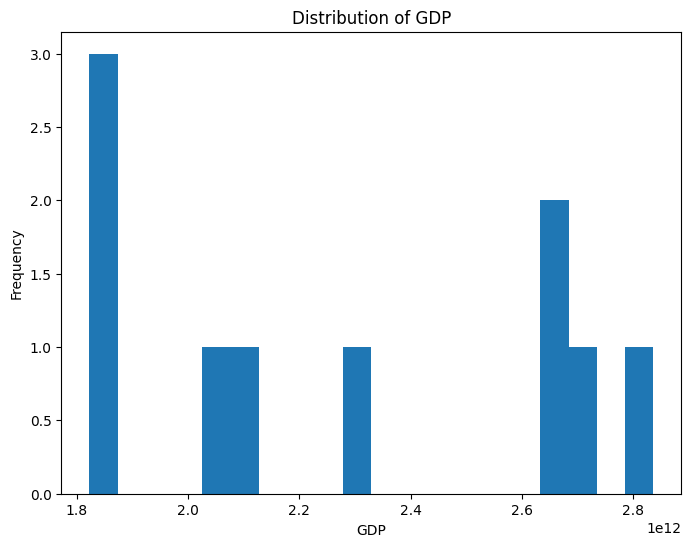

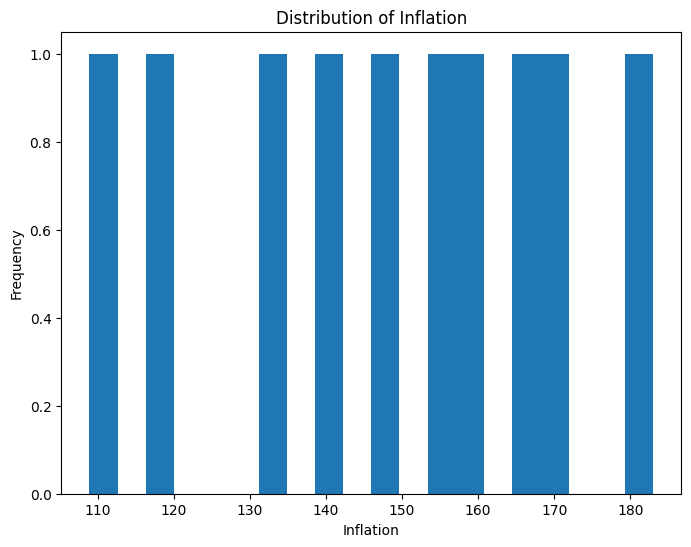

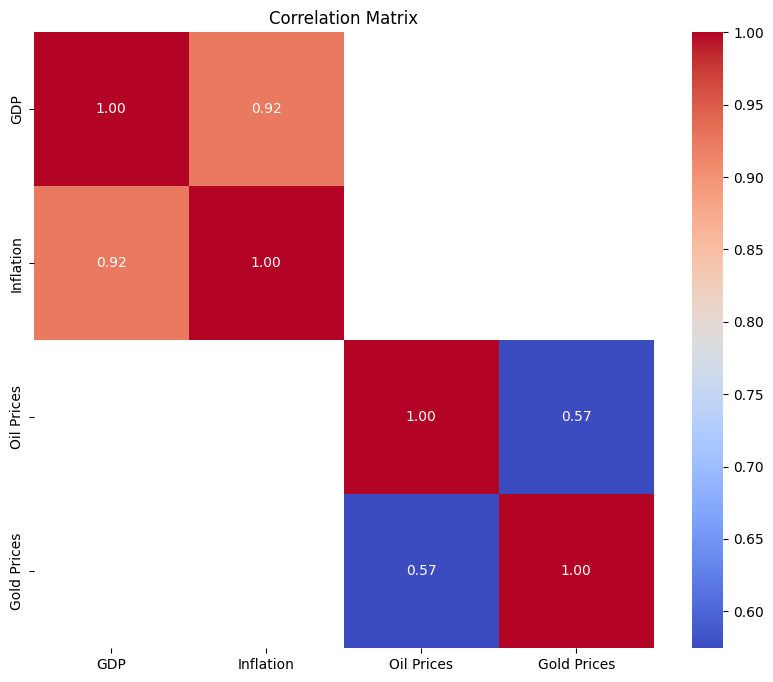

In [53]:
# Data Inspection
print("GDP Data:")
print(gdp_data.head())

print("\nInflation Data:")
print(inflation_data.head())

print("\nOil Prices Data:")
print(oil_prices.head())

print("\nGold Prices Data:")
print(gold_prices.head())

# Summary Statistics
print("\nSummary Statistics - GDP Data:")
print(gdp_data.describe())

print("\nSummary Statistics - Inflation Data:")
print(inflation_data.describe())

# Data Visualization
import matplotlib.pyplot as plt

# Histogram for GDP data
plt.figure(figsize=(8, 6))
plt.hist(gdp_data['GDP'], bins=20)
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.title('Distribution of GDP')
plt.show()

# Histogram for inflation data
plt.figure(figsize=(8, 6))
plt.hist(inflation_data['Inflation'], bins=20)
plt.xlabel('Inflation')
plt.ylabel('Frequency')
plt.title('Distribution of Inflation')
plt.show()

# Correlation Analysis
import seaborn as sns

# Compute correlation matrix
correlation_matrix = pd.concat([gdp_data, inflation_data, oil_prices, gold_prices], axis=1).corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Task 3 : Build Prediction model

Create prediction models using global and local economic variables from the first 8 years data in order to predict sectoral indices which will outperform nifty 50.

[*********************100%%**********************]  1 of 1 completed


Sectors expected to outperform Nifty 50 (ARIMA):
NIFTY 50
NIFTY BANK
NIFTY FMCG
NIFTY IT


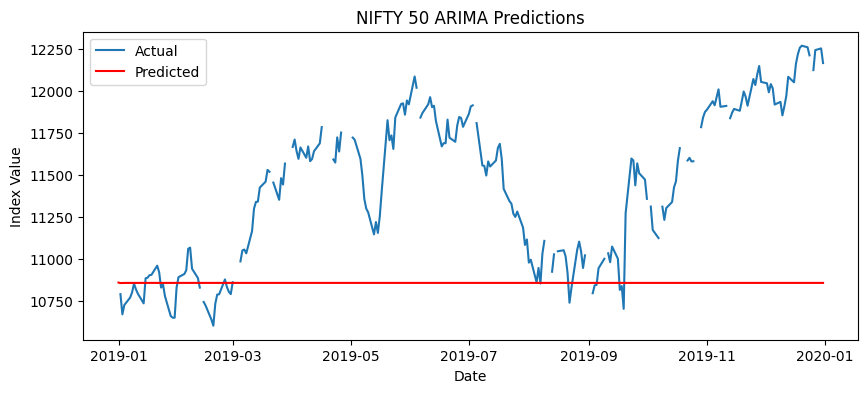

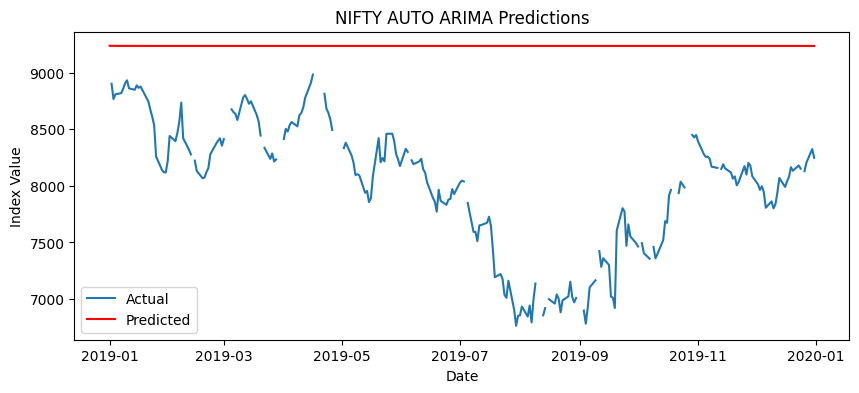

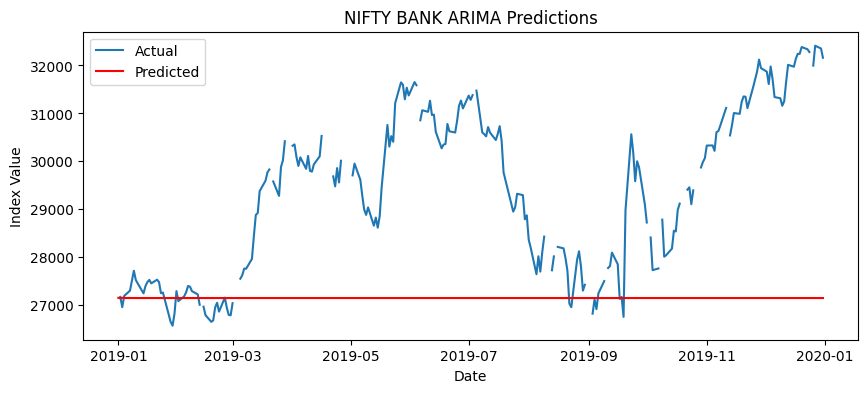

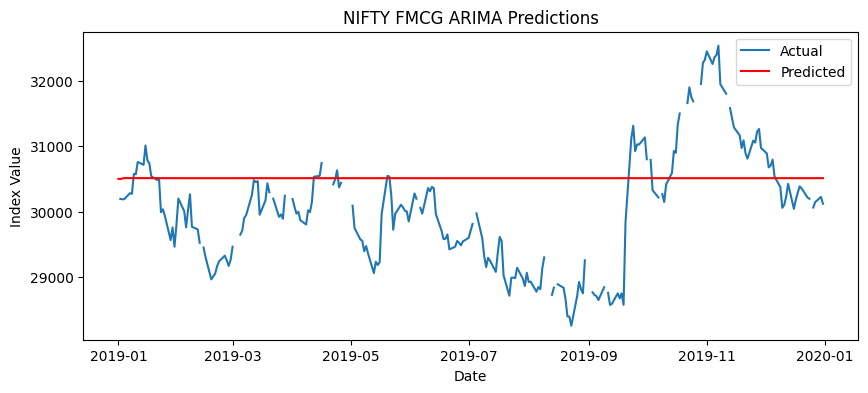

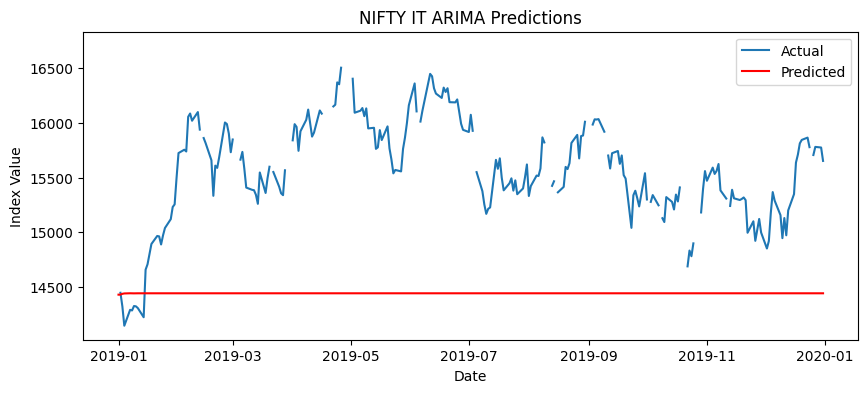

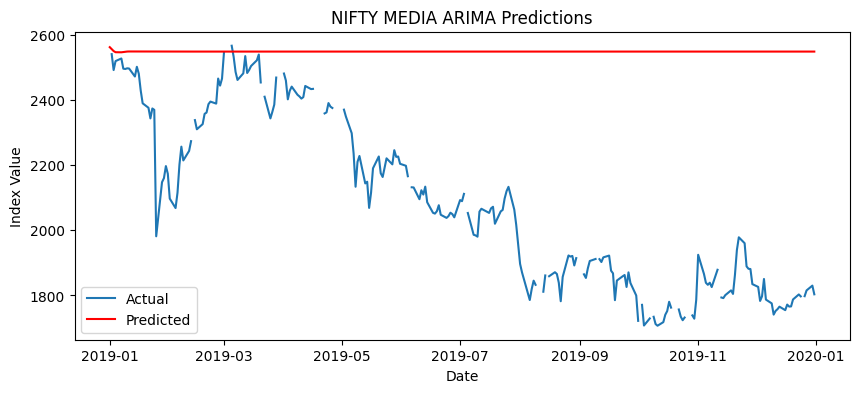

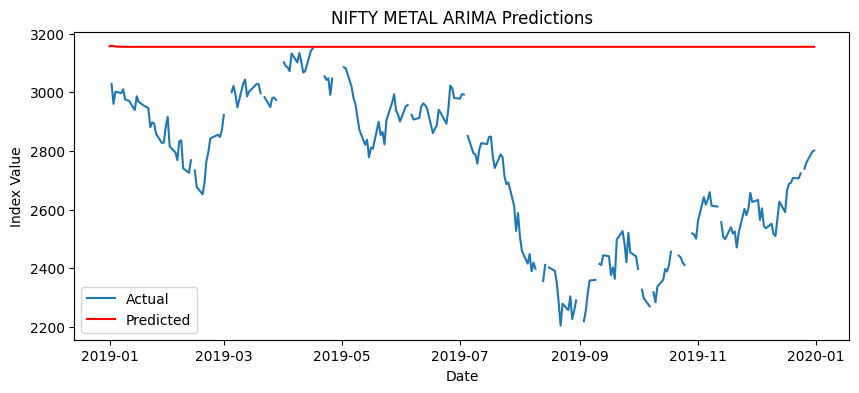

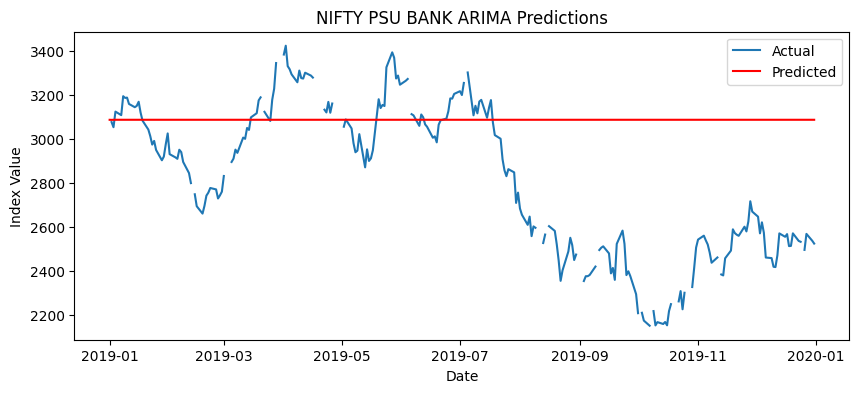

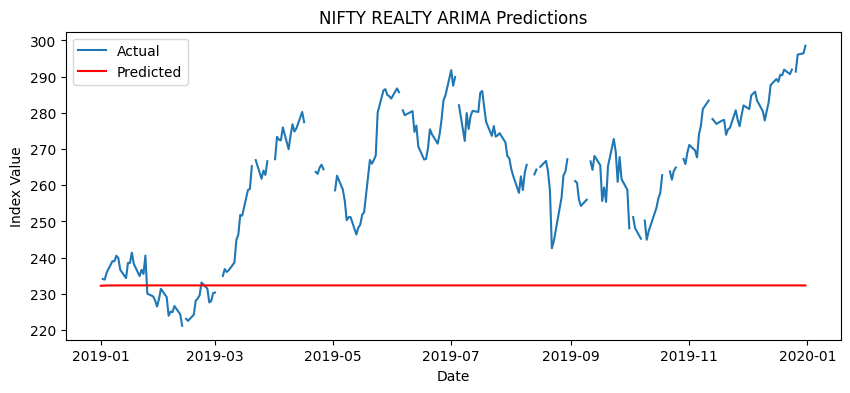

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ensure the data index has the correct frequency
combined_data.index = pd.to_datetime(combined_data.index)
combined_data = combined_data.asfreq('B')  # 'B' stands for business days

# Split data into training and testing sets
train_end = '2018-12-31'
test_start = '2019-01-01'

# Train and test data
train_data = combined_data[:train_end]
test_data = combined_data[test_start:]

# Fit ARIMA model for Nifty 50 index
nifty_50_ticker = "^NSEI"
nifty_50_data = yf.download(nifty_50_ticker, start="2011-01-01", end="2020-01-01")['Adj Close']
nifty_50_data.index = pd.to_datetime(nifty_50_data.index)
nifty_50_data = nifty_50_data.asfreq('B')

train_nifty_50 = nifty_50_data[:train_end]
test_nifty_50 = nifty_50_data[test_start:]

model_nifty_50 = ARIMA(train_nifty_50, order=(5, 1, 0))
model_fit_nifty_50 = model_nifty_50.fit()
forecast_nifty_50 = model_fit_nifty_50.forecast(steps=len(test_nifty_50))

# Fit ARIMA model for each sector index
arima_predictions = {}
for sector in combined_data.columns:
    model = ARIMA(train_data[sector], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))
    arima_predictions[sector] = forecast

# Compare sector predictions to Nifty 50 predictions
arima_outperformance = {}
for sector in arima_predictions.keys():
    arima_outperformance[sector] = (arima_predictions[sector] > forecast_nifty_50).sum()

# Display sectors expected to outperform Nifty 50
print("Sectors expected to outperform Nifty 50 (ARIMA):")
for sector, count in arima_outperformance.items():
    if count > len(test_data) / 2:  # more than half the test period
        print(f"{sector}")

# Plot ARIMA predictions
for sector in combined_data.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(test_data[sector], label='Actual')
    plt.plot(test_data.index, arima_predictions[sector], label='Predicted', color='red')
    plt.title(f'{sector} ARIMA Predictions')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.legend()
    plt.show()


Model Evaluation

In [9]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for ARIMA predictions
arima_rmse = {}
for sector in combined_data.columns:
    arima_rmse[sector] = mean_squared_error(test_data[sector], arima_predictions[sector], squared=False)

# Display ARIMA RMSE
print("ARIMA RMSE:")
for sector, rmse in arima_rmse.items():
    print(f"{sector}: {rmse}")



ARIMA RMSE:
NIFTY 50: 735.7816154684602
NIFTY AUTO: 1365.1556916441152
NIFTY BANK: 2775.2561732555946
NIFTY FMCG: 1006.1642747087301
NIFTY IT: 1215.3621151392292
NIFTY MEDIA: 532.7406343719879
NIFTY METAL: 487.5398829444644
NIFTY PSU BANK: 434.1788782548457
NIFTY REALTY: 35.54009933245129
